**EDA 1**

In [ ]:
#import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
 #load the dataset
 df = pd.read_csv('/content/BIKE DETAILS.csv')
 df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [ ]:
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [ ]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [ ]:
 # Check data types
df.dtypes

,0
name,object
selling_price,int64
year,int64
seller_type,object
owner,object
km_driven,int64
ex_showroom_price,float64


Text(0.5, 1.0, 'Distribution of Selling Price')

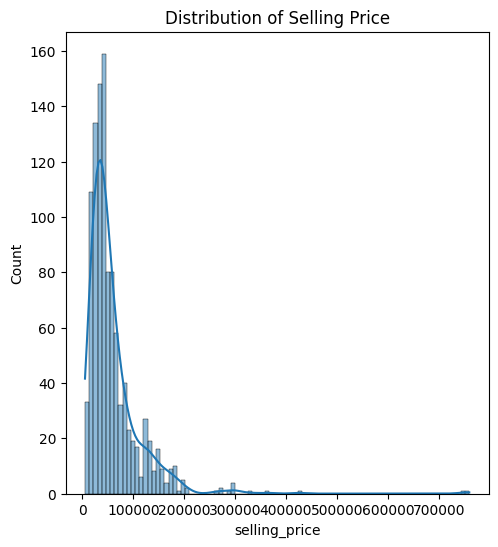

In [ ]:
 # Visualizing the distribution of selling price and km_driven
 plt.figure(figsize=(12, 6))
 plt.subplot(1, 2, 1)
 sns.histplot(df['selling_price'], kde=True)
 plt.title('Distribution of Selling Price')

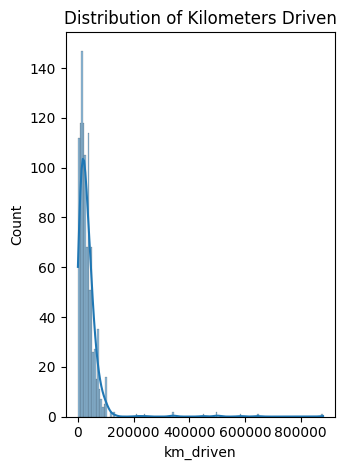

In [ ]:
 plt.subplot(1, 2, 2)
 sns.histplot(df['km_driven'], kde=True)
 plt.title('Distribution of Kilometers Driven')
 plt.tight_layout()
 plt.show()

In [ ]:
 # Calculate the range of selling prices
 selling_price_range = df['selling_price'].max() - df['selling_price'].min()
 selling_price_range

755000

In [ ]:
 # Calculate the median of the 'selling_price' column
 median_selling_price = df['selling_price'].median()
 median_selling_price

45000.0

In [ ]:
 # Find the most common seller type
 most_common_seller_type = df['seller_type'].mode()[0]
 most_common_seller_type

'Individual'

In [ ]:
 # Filter the bikes with km_driven > 50,000
 bikes_driven_more_50k = df[df['km_driven'] > 50000]
 bikes_driven_more_50k

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
15,Suzuki Access 125 [2007-2016],25000,2012,Individual,1st owner,55000,58314.0
20,Hero Passion Pro 110,15000,2008,Individual,1st owner,60000,NaN
31,Yamaha FZ S [2012-2016],38000,2013,Individual,1st owner,75000,79432.0
43,Hero Passion XPro,28000,2012,Individual,1st owner,81000,56750.0
...,...,...,...,...,...,...,...
1049,Hero Super Splendor,20000,2007,Individual,1st owner,55000,57000.0
1050,Bajaj Pulsar 150,20000,2010,Individual,1st owner,60000,75000.0
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [ ]:
 # Count the number of such bikes
 count_bikes_driven_more_50k = bikes_driven_more_50k.shape[0]
 count_bikes_driven_more_50k

170

In [ ]:
 # Group the data based on ownership type (owner) and calculate the average km_driven
 result = df.groupby('owner')['km_driven'].mean()
 result

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


In [ ]:
 # Total number of bikes in the dataset
 total_bikes = len(df)
 total_bikes

1061

In [ ]:
 # Count bikes from the year 2015 or older
 bikes_2015_or_older = len(df[df['year'] <= 2015])
 bikes_2015_or_older

601

In [ ]:
 # Calculate the proportion
 proportion = bikes_2015_or_older / total_bikes
 proportion

0.5664467483506126

In [ ]:
 # Convert to percentage
 percentage = proportion * 100
 percentage

56.64467483506126

In [ ]:
 print(f"Percentage of bikes from 2015 or older: {percentage:.2f}%")

Percentage of bikes from 2015 or older: 56.64%


In [ ]:
 # Check for missing values in each column
 missing_values = df.isnull().sum()
 missing_values

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


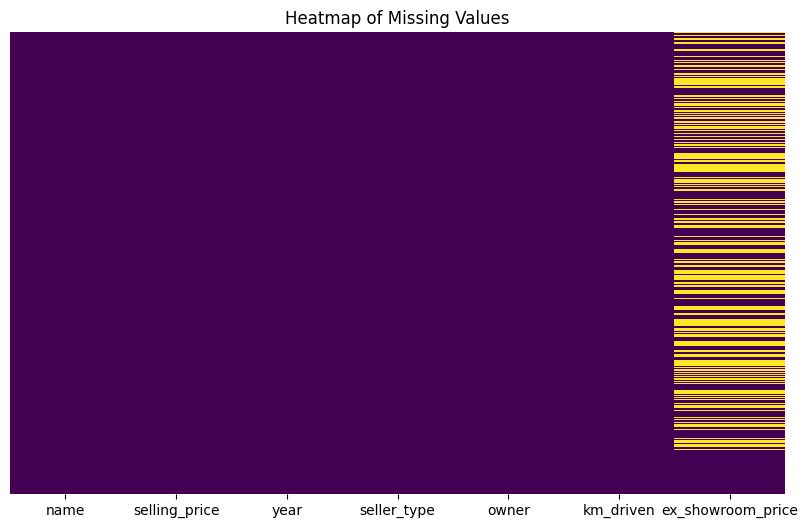

In [ ]:
 plt.figure(figsize=(10, 6))
 sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
 plt.title("Heatmap of Missing Values")
 plt.show()

In [ ]:
 # Drop rows with missing values in the ex_showroom_price column (if not already handled)
 df_cleaned = df.dropna(subset=['ex_showroom_price'])
 df_cleaned

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [ ]:
 # Find the row with the maximum ex_showroom_price
 highest_price_row = df_cleaned.loc[df_cleaned['ex_showroom_price'].idxmax()]
 highest_price_row

,134
name,Harley-Davidson Street Bob
selling_price,750000
year,2013
seller_type,Individual
owner,2nd owner
km_driven,12000
ex_showroom_price,1278000.0


In [ ]:
# Display the highest price and the associated bike details
highest_price = highest_price_row['ex_showroom_price']
print(highest_price)

1278000.0


In [ ]:
 bike_name = highest_price_row['name']
 bike_name

'Harley-Davidson Street Bob'

In [ ]:
# Count the total number of bikes listed by each seller type
seller_type_counts = df['seller_type'].value_counts()
print(seller_type_counts)

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


In [ ]:
# Check if "1st owner" exists in the 'owner' column
print(df['owner'].unique())

['1st owner' '2nd owner' '3rd owner' '4th owner']


In [ ]:
 # Filter bikes where the owner is "1st owner"
 first_owner_bikes = df[df['owner'] == '1st owner']
 first_owner_bikes

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
...,...,...,...,...,...,...,...
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [ ]:
 # Check for missing values in the relevant columns
 print(first_owner_bikes[['km_driven', 'selling_price']].isnull().sum())

km_driven        0
selling_price    0
dtype: int64


In [ ]:
 # Optional: Filter km_driven to focus on reasonable values
 first_owner_bikes = first_owner_bikes[first_owner_bikes['km_driven'] < 100000]
first_owner_bikes

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
...,...,...,...,...,...,...,...
1054,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.0
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


<Axes: xlabel='km_driven', ylabel='selling_price'>

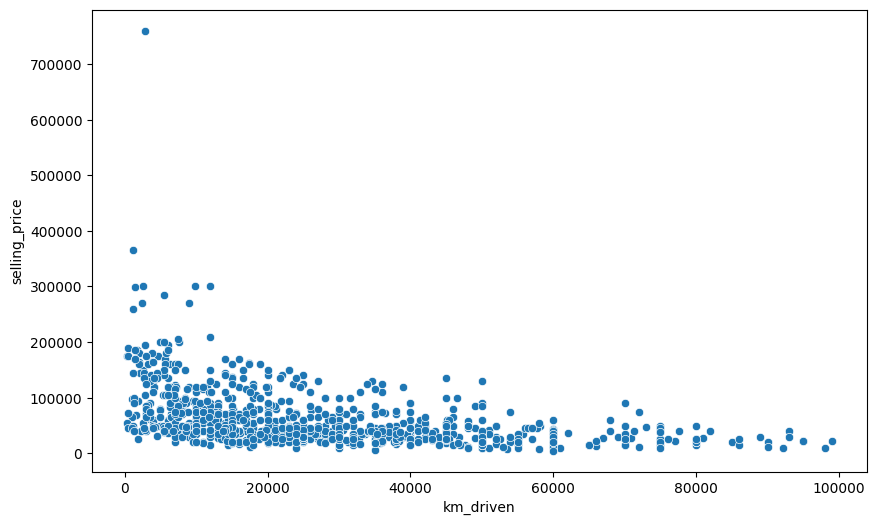

In [ ]:
 # Create the plot
 plt.figure(figsize=(10, 6))
 sns.scatterplot(x=first_owner_bikes['km_driven'], y=first_owner_bikes['selling_price'])

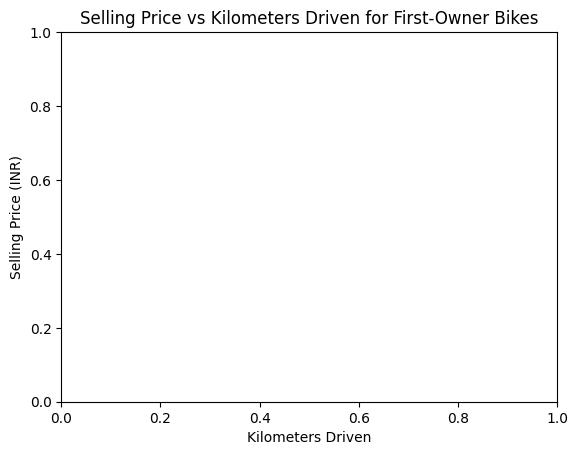

In [ ]:
 # Add labels to the plot and show
 plt.title('Selling Price vs Kilometers Driven for First-Owner Bikes')
 plt.xlabel('Kilometers Driven')
 plt.ylabel('Selling Price (INR)')
 plt.show()

In [ ]:
# To identify and remove outliers in the km_driven column using the IQR (Interquartile Range) method

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'km_driven'
Q1 = df['km_driven'].quantile(0.25)
print(Q1)

Q3 = df['km_driven'].quantile(0.75)
print(Q3)


13500.0
43000.0


In [ ]:
 # Calculate the IQR
 IQR = Q3 - Q1
 IQR

29500.0

In [ ]:
 # Define the bounds for the outliers
 lower_bound = Q1 - 1.5 * IQR
 upper_bound = Q3 + 1.5 * IQR

In [ ]:
 # Filter the dataset to remove outliers in 'km_driven'
 df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

In [ ]:
 # Check the shape before and after removing outliers
 print(f"Original dataset shape: {df.shape}")
 print(f"Dataset shape after removing outliers: {df_no_outliers.shape}")

Original dataset shape: (1061, 7)
Dataset shape after removing outliers: (1022, 7)


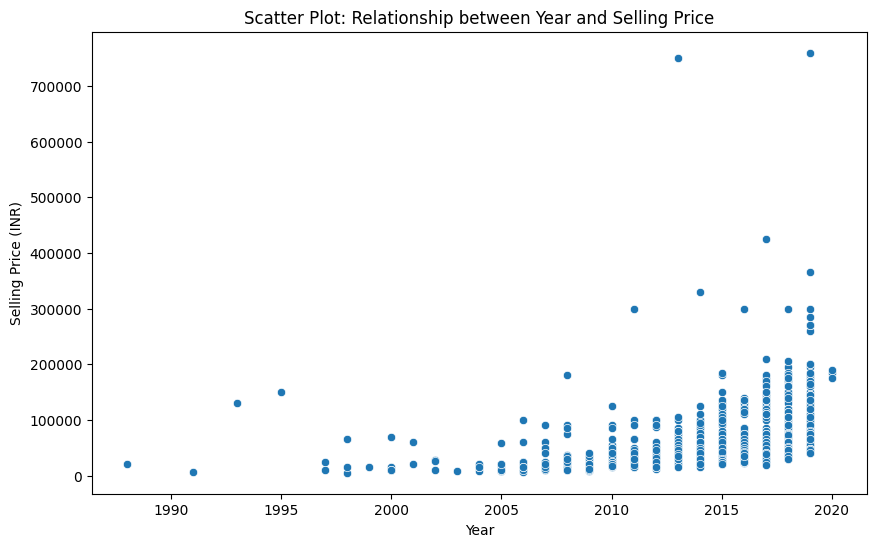

In [ ]:
 # Scatter Plot to visualize the relationship between 'year' and 'selling_price'
 plt.figure(figsize=(10, 6))
 sns.scatterplot(x='year', y='selling_price', data=df)
 plt.title('Scatter Plot: Relationship between Year and Selling Price')
 plt.xlabel('Year')
 plt.ylabel('Selling Price (INR)')
 plt.show()

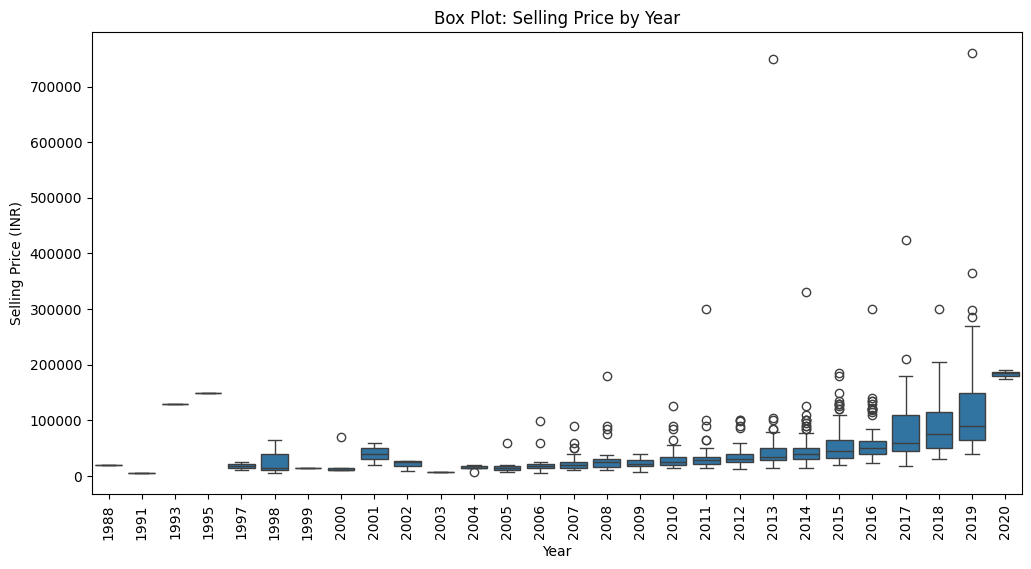

In [ ]:
 # Box Plot to visualize the distribution of 'selling_price' by 'year'
 plt.figure(figsize=(12, 6))
 sns.boxplot(x='year', y='selling_price', data=df)
 plt.title('Box Plot: Selling Price by Year')
 plt.xlabel('Year')
 plt.ylabel('Selling Price (INR)')
 plt.xticks(rotation=90)
 plt.show()

In [ ]:
 #To calculate the average depreciation in selling price based on the bike's age (current year
# Current year (for depreciation calculation)
 current_year = 2025
 current_year

2025

In [ ]:
 # Calculate the age of the bike
 df['age'] = current_year - df['year']

In [ ]:
 # Calculate depreciation as the difference between ex_showroom_price and selling_price
 df['depreciation'] = df['ex_showroom_price'] - df['selling_price']

In [ ]:
 # Group by bike age and calculate the average depreciation for each age group
 average_depreciation_by_age = df.groupby('age')['depreciation'].mean().reset_index()

In [ ]:
 # Display the result
 print(average_depreciation_by_age)

    age  depreciation
0     5 -34260.000000
1     6   2954.562500
2     7  13023.194805
3     8  22306.082353
4     9  28328.190476
5    10  28013.275000
6    11  34505.606061
7    12  43086.886792
8    13  37317.648649
9    14  47102.666667
10   15  45658.928571
11   16  38227.785714
12   17  54732.428571
13   18  42399.000000
14   19  39664.500000
15   20  44852.000000
16   21  36852.000000
17   22           NaN
18   23           NaN
19   24  34852.000000
20   25           NaN
21   26           NaN
22   27           NaN
23   28           NaN
24   30           NaN
25   32           NaN
26   34           NaN
27   37           NaN


In [ ]:
 # Calculate the average selling price by year
 avg_price_by_year = df.groupby('year')['selling_price'].mean().reset_index()
 avg_price_by_year

,year,selling_price
0,1988,20000.000000
1,1991,6000.000000
2,1993,130000.000000
3,1995,150000.000000
4,1997,17500.000000
5,1998,28333.333333
6,1999,15000.000000
7,2000,20833.333333
8,2001,40000.000000
9,2002,20666.666667


In [ ]:
# Rename the column in avg_price_by_year to avoid conflict
avg_price_by_year.rename(columns={'selling_price': 'selling_price_avg'}, inplace=True)
print(avg_price_by_year)

    year  selling_price_avg
0   1988       20000.000000
1   1991        6000.000000
2   1993      130000.000000
3   1995      150000.000000
4   1997       17500.000000
5   1998       28333.333333
6   1999       15000.000000
7   2000       20833.333333
8   2001       40000.000000
9   2002       20666.666667
10  2003        8000.000000
11  2004       15100.000000
12  2005       16978.571429
13  2006       23380.000000
14  2007       24927.586207
15  2008       34289.285714
16  2009       22267.857143
17  2010       31793.333333
18  2011       35655.721311
19  2012       35748.400000
20  2013       51136.986301
21  2014       48668.131868
22  2015       56500.000000
23  2016       58469.018692
24  2017       78894.736842
25  2018       87660.374046
26  2019      119689.511628
27  2020      183333.333333


In [ ]:
 # Align the two DataFrames before the merge
 df, avg_price_by_year = df.align(avg_price_by_year, join='inner', axis=0)

In [ ]:
 # Merge the dataset with the average selling price by year
 df = df.merge(avg_price_by_year, on='year', how='left')
 df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,depreciation,selling_price_avg
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,6,NaN,119689.511628
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN,8,NaN,78894.736842
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,7,-1886.0,87660.374046
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,10,24643.0,56500.000000
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN,14,NaN,35655.721311
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0,15,35857.0,31793.333333
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0,7,9219.0,87660.374046
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN,17,NaN,34289.285714
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN,15,NaN,31793.333333
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0,9,10122.0,58469.018692


In [ ]:
 # Define a threshold for significantly above average price (e.g., 1.5 times the average price)
 threshold = 1.5
 threshold

1.5

In [ ]:
 # Find bikes with selling price significantly above average for their manufacturing year
 significantly_above_avg_bikes = df[df['selling_price'] > threshold * df['selling_price_avg']]
 significantly_above_avg_bikes

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,depreciation,selling_price_avg
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,7,-1886.0,87660.374046
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN,17,NaN,34289.285714
13,Yamaha YZF R3,365000,2019,Individual,1st owner,1127,351680.0,6,-13320.0,119689.511628
18,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,23000,148114.0,7,-1886.0,87660.374046
23,Jawa Standard,180000,2019,Individual,1st owner,2000,NaN,6,NaN,119689.511628
24,Royal Enfield Thunderbird 350,110000,2016,Individual,1st owner,20000,NaN,9,NaN,58469.018692


In [ ]:
# Display the bike names that are priced significantly above the average
print(significantly_above_avg_bikes[['name', 'selling_price', 'year']])

                                    name  selling_price  year
2    Royal Enfield Classic Gunmetal Grey         150000  2018
7   Royal Enfield Bullet 350 [2007-2011]         180000  2008
13                         Yamaha YZF R3         365000  2019
18   Royal Enfield Classic Gunmetal Grey         150000  2018
23                         Jawa Standard         180000  2019
24         Royal Enfield Thunderbird 350         110000  2016


In [ ]:
 # To develop and visualize the correlation matrix for numeric columns using a heatmap, you can

In [ ]:
 # Select numeric columns from the dataset
 numeric_columns = df.select_dtypes(include=['float64', 'int64'])
 numeric_columns

,selling_price,year,km_driven,ex_showroom_price,age,depreciation,selling_price_avg
0,175000,2019,350,NaN,6,NaN,119689.511628
1,45000,2017,5650,NaN,8,NaN,78894.736842
2,150000,2018,12000,148114.0,7,-1886.0,87660.374046
3,65000,2015,23000,89643.0,10,24643.0,56500.000000
4,20000,2011,21000,NaN,14,NaN,35655.721311
5,18000,2010,60000,53857.0,15,35857.0,31793.333333
6,78500,2018,17000,87719.0,7,9219.0,87660.374046
7,180000,2008,39000,NaN,17,NaN,34289.285714
8,30000,2010,32000,NaN,15,NaN,31793.333333
9,50000,2016,42000,60122.0,9,10122.0,58469.018692


 **EDA 2**

In [ ]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats

In [ ]:
df = pd.read_csv("/content/Car Sale.csv")
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [ ]:
 # Check the data types of columns
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [ ]:
 # Check for missing values
 df.isnull().sum()

,0
Car_id,0
Date,0
Customer Name,1
Gender,0
Annual Income,0
Dealer_Name,0
Company,0
Model,0
Engine,0
Transmission,0


In [ ]:
 df.isnull()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
23902,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
23903,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
23904,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
 # Get summary statistics
 df.describe()

,Annual Income,Price ($),Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


In [ ]:
 # Check for duplicate rows
 df.duplicated().sum()

0

In [ ]:
 # Check unique values in categorical columns
 df['Gender'].value_counts()
 df['Transmission'].value_counts()
 df['Body Style'].value_counts()

,count
Body Style,
SUV,6374
Hatchback,6128
Sedan,4488
Passenger,3945
Hardtop,2971


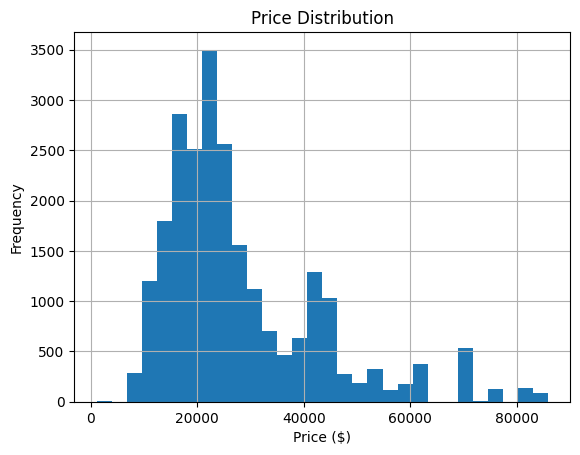

In [ ]:
 # Plot histogram for numerical features
 df['Price ($)'].hist(bins=30)
 plt.title('Price Distribution')
 plt.xlabel('Price ($)')
 plt.ylabel('Frequency')
 plt.show()

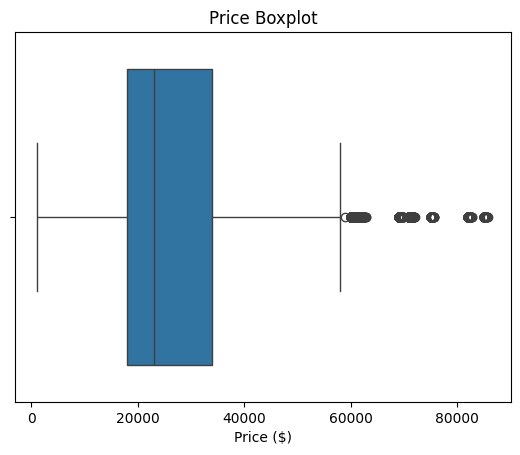

In [ ]:
 # Boxplot for Price
 sns.boxplot(x='Price ($)', data=df)
 plt.title('Price Boxplot')
 plt.show()

In [ ]:
 #average selling price of cars for each dealer and how it compares across different dealers, fo
 # Grouping the dataset by 'Dealer_Name' and calculating the average selling price for each deale
 average_price_per_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().reset_index()
 average_price_per_dealer

,Dealer_Name,Price ($)
0,Buddy Storbeck's Diesel Service Inc,27217.261563
1,C & M Motors Inc,28111.755200
2,Capitol KIA,28189.703822
3,Chrysler Plymouth,27555.526400
4,Chrysler of Tri-Cities,28123.091054
5,Classic Chevy,28602.014446
6,Clay Johnson Auto Sales,27816.027113
7,Diehl Motor CO Inc,27993.929487
8,Enterprise Rent A Car,28312.580800
9,Gartner Buick Hyundai Saab,28247.621019


In [ ]:
# Sorting the dealers by the average price in descending order
average_price_per_dealer_sorted = average_price_per_dealer.sort_values(by='Price ($)', ascending=False)
print(average_price_per_dealer_sorted)

                                        Dealer_Name     Price ($)
27                                        U-Haul CO  28769.919006
5                                     Classic Chevy  28602.014446
19                             Rabun Used Car Sales  28527.536177
11                                  Iceberg Rentals  28522.958533
8                             Enterprise Rent A Car  28312.580800
23                Scrivener Performance Engineering  28297.371589
9                        Gartner Buick Hyundai Saab  28247.621019
22                                 Saab-Belle Dodge  28190.139888
2                                       Capitol KIA  28189.703822
20                                    Race Car Help  28163.372706
4                            Chrysler of Tri-Cities  28123.091054
24                             Star Enterprises Inc  28113.055244
25                                    Suburban Ford  28112.206758
1                                  C & M Motors Inc  28111.755200
26        

In [ ]:
average_price_per_dealer_sorted = average_price_per_dealer.sort_values(by='Price ($)', ascending=False)

In [ ]:
 # Grouping the dataset by 'Company' (car brand) and calculating the standard deviation of prices
 price_variation_per_brand = df.groupby('Company')['Price ($)'].std().reset_index()
 price_variation_per_brand

,Company,Price ($)
0,Acura,8183.046414
1,Audi,12904.243867
2,BMW,15065.578723
3,Buick,17142.232626
4,Cadillac,19517.120220
5,Chevrolet,13311.063223
6,Chrysler,11583.286811
7,Dodge,11187.592085
8,Ford,15849.090227
9,Honda,11148.629062


In [ ]:
# Sorting the brands by standard deviation to find the one with the highest variation
price_variation_sorted = price_variation_per_brand.sort_values(by='Price ($)', ascending=False)
print(price_variation_sorted)

       Company     Price ($)
15     Lincoln  19658.050211
24        Saab  19653.740089
4     Cadillac  19517.120220
21    Plymouth  19065.997338
14       Lexus  17852.923492
3        Buick  17142.232626
17     Mercury  16445.172195
19      Nissan  16214.264017
25      Saturn  15990.223671
8         Ford  15849.090227
16  Mercedes-B  15722.807459
20  Oldsmobile  15711.345857
27      Toyota  15367.131714
2          BMW  15065.578723
22     Pontiac  14348.963592
11    Infiniti  13696.332844
5    Chevrolet  13311.063223
29       Volvo  12933.790185
26      Subaru  12920.771620
1         Audi  12904.243867
28  Volkswagen  12527.124011
18  Mitsubishi  11671.343035
6     Chrysler  11583.286811
7        Dodge  11187.592085
9        Honda  11148.629062
12      Jaguar  10222.531533
13        Jeep   9459.834418
0        Acura   8183.046414
23     Porsche   5261.839206
10     Hyundai   3485.982649


In [ ]:
 #To understand the distribution of car prices for each transmission type and compare the interq

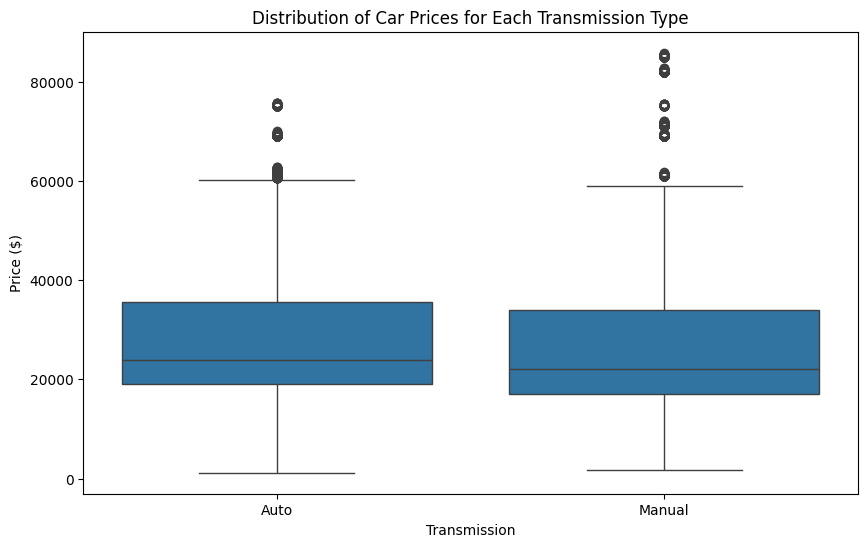

In [ ]:
# Boxplot to visualize distribution of car prices by transmission type
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Transmission', y='Price ($)')
plt.title('Distribution of Car Prices for Each Transmission Type')
plt.show()

In [ ]:
 # Calculate IQR for each transmission type
 q1 = df.groupby('Transmission')['Price ($)'].quantile(0.25)
 q3 = df.groupby('Transmission')['Price ($)'].quantile(0.75)
 iqr = q3 - q1

In [ ]:
 # Display IQR for each transmission type
 print("Interquartile Range (IQR) for each Transmission Type:")
 print(iqr)

Interquartile Range (IQR) for each Transmission Type:
Transmission
Auto      16500.0
Manual    17000.0
Name: Price ($), dtype: float64


In [ ]:
 # To analyze the distribution of car prices across different regions, we can use boxplots or vi

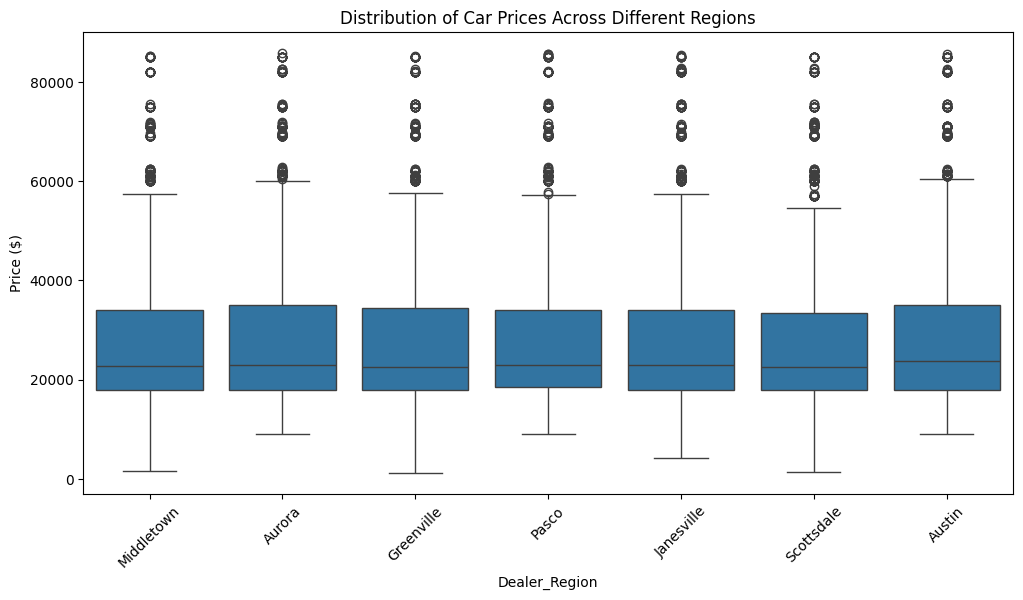

In [ ]:
 # Boxplot to visualize distribution of car prices by region
 plt.figure(figsize=(12,6))
 sns.boxplot(data=df, x='Dealer_Region', y='Price ($)')
 plt.title('Distribution of Car Prices Across Different Regions')
 plt.xticks(rotation=45)
 plt.show()

In [ ]:
 # Calculate summary statistics for car prices by region
 region_stats = df.groupby('Dealer_Region')['Price ($)'].describe()
 region_stats

,count,mean,std,min,25%,50%,75%,max
Dealer_Region,,,,,,,,
Aurora,3130.0,28334.626837,15026.207252,9000.0,18001.0,23000.0,35000.0,85800.0
Austin,4135.0,28341.603628,14903.884549,9000.0,18001.0,23801.0,35001.0,85601.0
Greenville,3128.0,28180.819054,15101.538328,1200.0,18001.0,22500.0,34500.0,85200.0
Janesville,3821.0,27833.350955,14344.995638,4300.0,18001.0,23000.0,34000.0,85400.0
Middletown,3128.0,27856.338875,14619.842395,1700.0,18000.0,22750.0,34000.0,85300.0
Pasco,3131.0,28119.039923,14659.315941,9000.0,18500.5,23000.0,34000.0,85600.0
Scottsdale,3433.0,27954.958928,14902.916820,1450.0,18000.0,22600.0,33500.0,85001.0


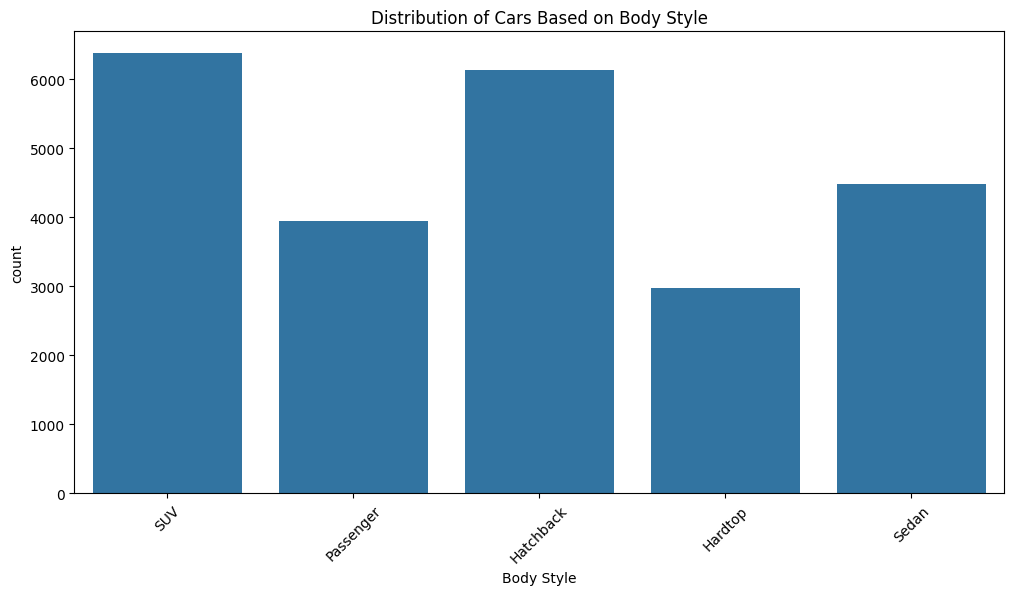

In [ ]:
 # Countplot to visualize distribution of cars based on body styles
 plt.figure(figsize=(12,6))
 sns.countplot(data=df, x='Body Style')
 plt.title('Distribution of Cars Based on Body Style')
 plt.xticks(rotation=45)
 plt.show()

In [ ]:
# Calculate the percentage of cars for each body style
body_style_distribution = df['Body Style'].value_counts(normalize=True) * 100
print(body_style_distribution)

Body Style
SUV          26.662762
Hatchback    25.633732
Sedan        18.773530
Passenger    16.502133
Hardtop      12.427842
Name: proportion, dtype: float64


In [ ]:
 # Calculate the average selling price by gender
 average_price_by_gender = df.groupby('Gender')['Price ($)'].mean()
 average_price_by_gender

,Price ($)
Gender,
Female,28277.265270
Male,28039.429407


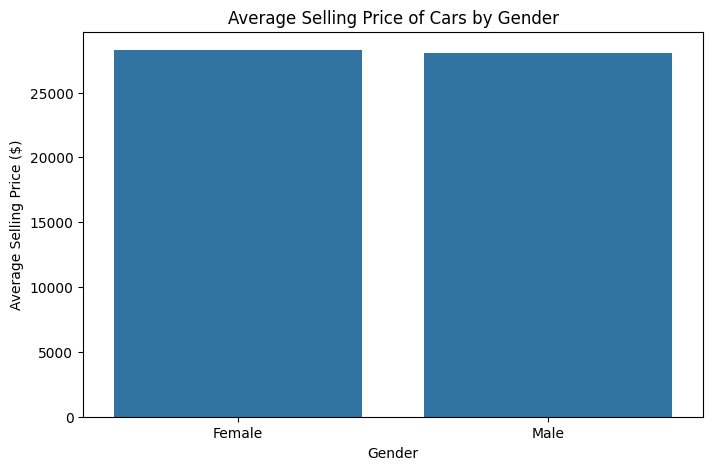

In [ ]:
 # Plotting the average selling price by gender
 plt.figure(figsize=(8,5))
 sns.barplot(x=average_price_by_gender.index, y=average_price_by_gender.values)
 plt.title('Average Selling Price of Cars by Gender')
 plt.xlabel('Gender')
 plt.ylabel('Average Selling Price ($)')
 plt.show()

In [ ]:
 # To analyze the distribution of car prices by region and how the number of cars sold varies by

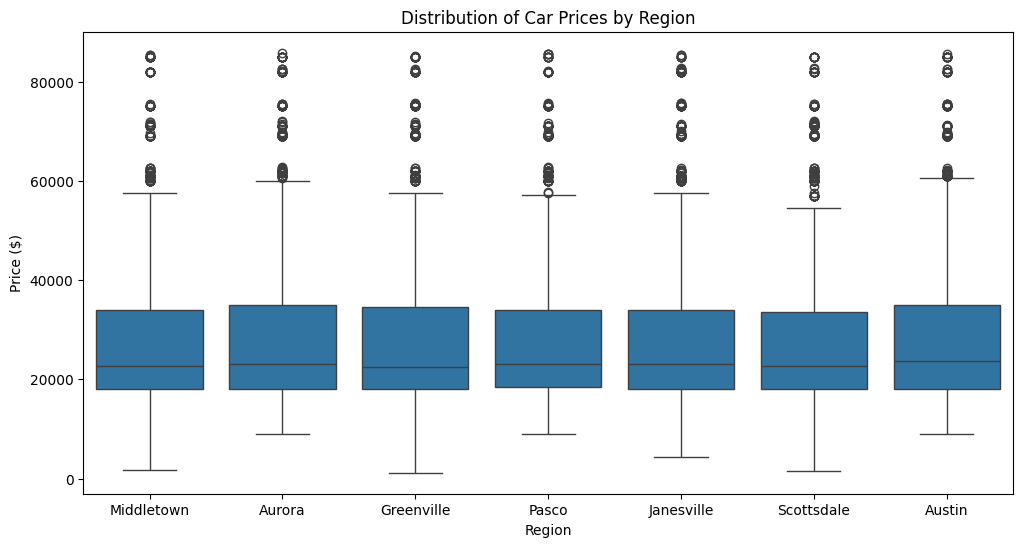

In [ ]:
 # Box plot to show the distribution of car prices by region
 plt.figure(figsize=(12, 6))
 sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
 plt.title('Distribution of Car Prices by Region')
 plt.xlabel('Region')
 plt.ylabel('Price ($)')
 plt.show()

In [ ]:
 # Count the number of cars sold by region
 cars_sold_by_region = df['Dealer_Region'].value_counts()
 cars_sold_by_region

,count
Dealer_Region,
Austin,4135
Janesville,3821
Scottsdale,3433
Pasco,3131
Aurora,3130
Middletown,3128
Greenville,3128


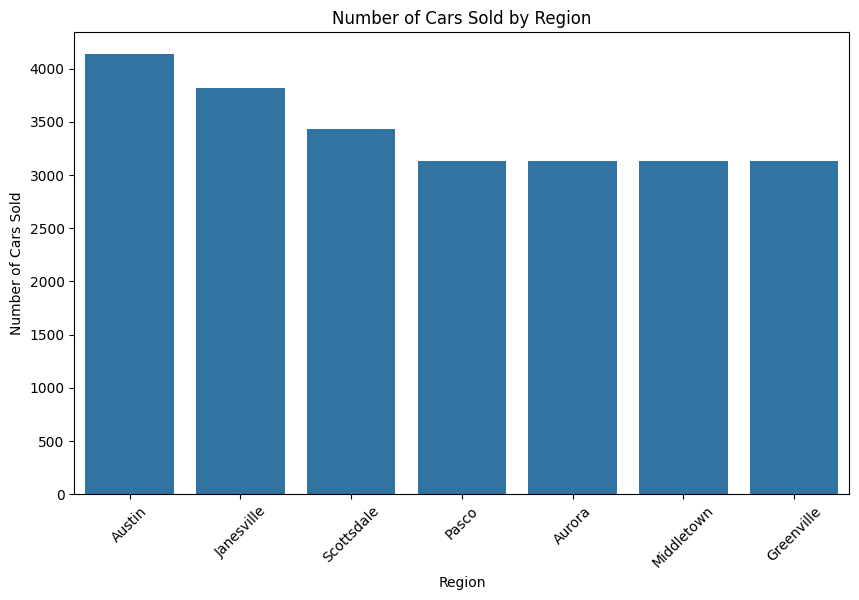

In [ ]:
 # Plotting the number of cars sold by region
 plt.figure(figsize=(10,6))
 sns.barplot(x=cars_sold_by_region.index, y=cars_sold_by_region.values)
 plt.title('Number of Cars Sold by Region')
 plt.xlabel('Region')
 plt.ylabel('Number of Cars Sold')
 plt.xticks(rotation=45)
 plt.show()

In [ ]:
 # We calculate the average selling price (Price ($)) for each engine size.
 # Grouping by 'Engine' and calculating the average selling price
 avg_price_by_engine = df.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)
 avg_price_by_engine

,Price ($)
Engine,
DoubleÂ Overhead Camshaft,28248.525972
Overhead Camshaft,27914.710631


<ipython-input-117-69688c139eea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_engine.index, y=avg_price_by_engine.values, palette="coolwarm")


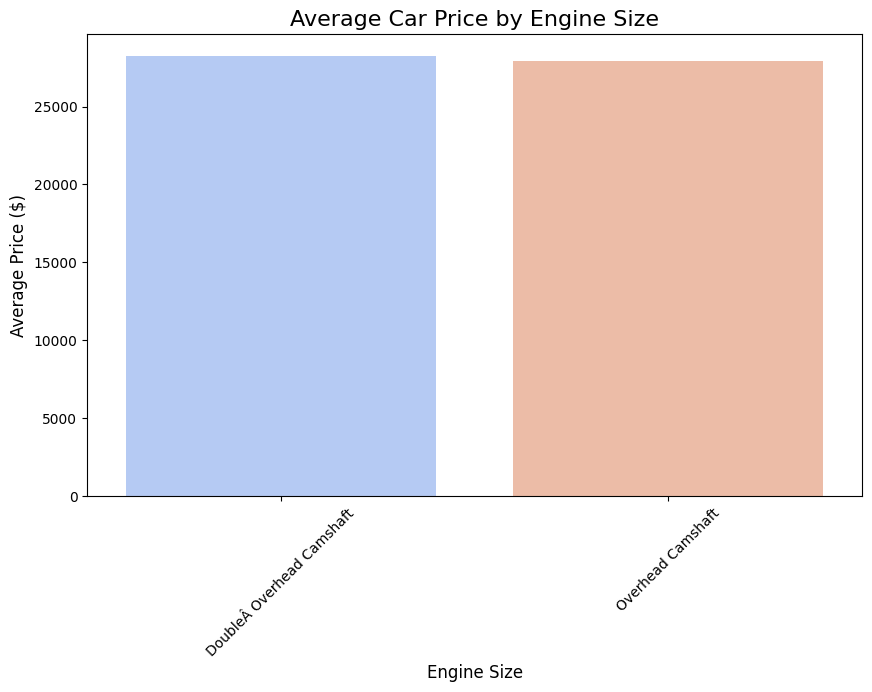

In [ ]:
 # Plotting the average price by engine size
 plt.figure(figsize=(10, 6))
 sns.barplot(x=avg_price_by_engine.index, y=avg_price_by_engine.values, palette="coolwarm")
 plt.title("Average Car Price by Engine Size", fontsize=16)
 plt.xlabel("Engine Size", fontsize=12)
 plt.ylabel("Average Price ($)", fontsize=12)
 plt.xticks(rotation=45)
 plt.show()

In [ ]:
 # Defining income brackets
bins = [0, 50000, 100000, 150000, 200000, df['Annual Income'].max()]
labels = ['Low (<50k)', 'Medium (50k-100k)', 'High (100k-150k)', 'Upper-High (150k-200k)', 'Luxury (200k+)']

In [ ]:
 # Adding a new column for income brackets
 df['Income Bracket'] = pd.cut(df['Annual Income'], bins=bins, labels=labels)

In [ ]:
 # Grouping by income bracket and calculating average car price
 avg_price_by_income = df.groupby('Income Bracket')['Price ($)'].mean()
 avg_price_by_income

<ipython-input-122-7d96f22d6fde>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_income = df.groupby('Income Bracket')['Price ($)'].mean()


,Price ($)
Income Bracket,
Low (<50k),27884.29782
Medium (50k-100k),43000.00000
High (100k-150k),23200.20000
Upper-High (150k-200k),22650.40000
Luxury (200k+),28152.04346


<ipython-input-123-145a7b138cdd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_income.index, y=avg_price_by_income.values, palette="viridis")


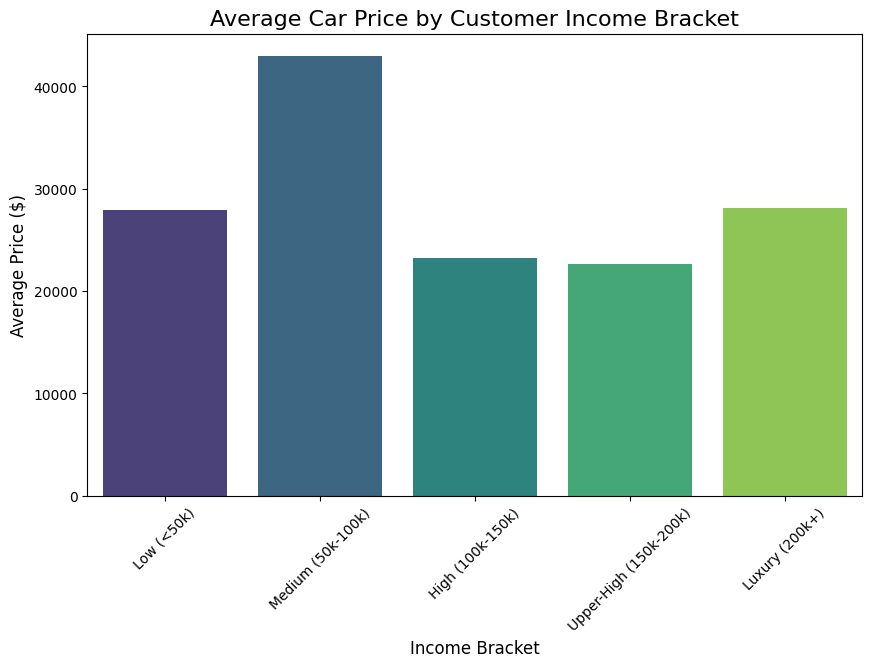

In [ ]:
 # Plotting average car price by income bracket
 plt.figure(figsize=(10, 6))
 sns.barplot(x=avg_price_by_income.index, y=avg_price_by_income.values, palette="viridis")
 plt.title("Average Car Price by Customer Income Bracket", fontsize=16)
 plt.xlabel("Income Bracket", fontsize=12)
 plt.ylabel("Average Price ($)", fontsize=12)
 plt.xticks(rotation=45)
 plt.show()

In [ ]:
 # To analyze the top 5 car models with the highest number of sales and their price distribution

In [ ]:
 # Count the number of sales for each car model
 top_5_models = df['Model'].value_counts().head(5)
 top_5_models

,count
Model,
Diamante,418
Silhouette,411
Prizm,411
Passat,391
Ram Pickup,383


In [ ]:
 # Filter the data for the top 5 car models
 top_5_data = df[df['Model'].isin(top_5_models.index)]

<ipython-input-127-977ae02559ed>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_5_data, x='Model', y='Price ($)', palette="Set2")


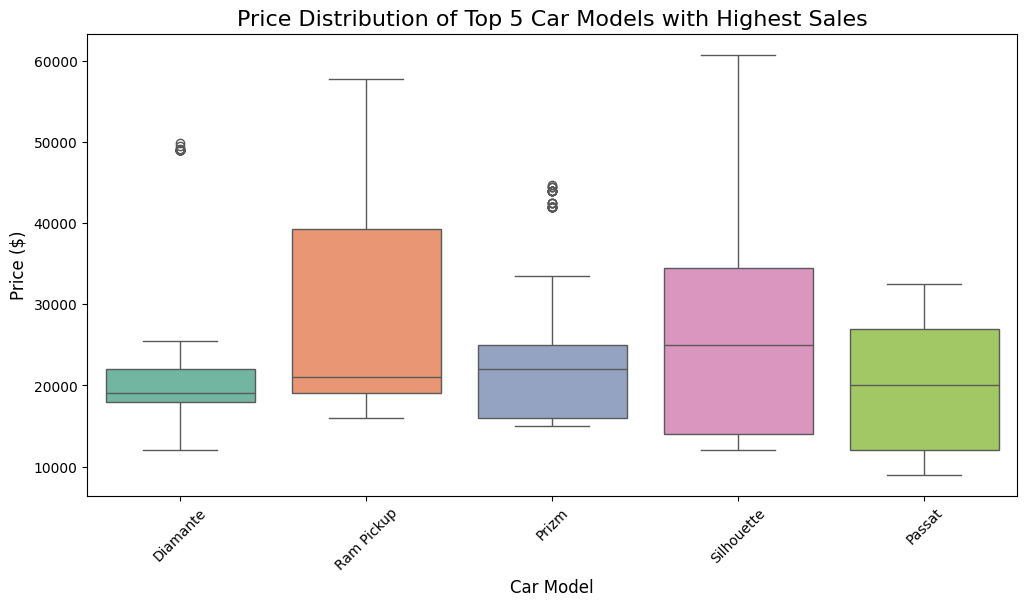

In [ ]:
# Plot the price distribution for the top 5 car models
plt.figure(figsize=(12, 6))
sns.boxplot(data=top_5_data, x='Model', y='Price ($)', palette="Set2")
plt.title("Price Distribution of Top 5 Car Models with Highest Sales", fontsize=16)
plt.xlabel("Car Model", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
 # Calculate average price grouped by Engine size and Color
 engine_color_price = df.groupby(['Engine', 'Color'])['Price ($)'].mean().reset_index()
 engine_color_price

,Engine,Color,Price ($)
0,DoubleÂ Overhead Camshaft,Black,25766.451103
1,DoubleÂ Overhead Camshaft,Pale White,30347.987460
2,DoubleÂ Overhead Camshaft,Red,27434.392314
3,Overhead Camshaft,Black,31732.967164
4,Overhead Camshaft,Pale White,24327.767694
5,Overhead Camshaft,Red,30153.405229


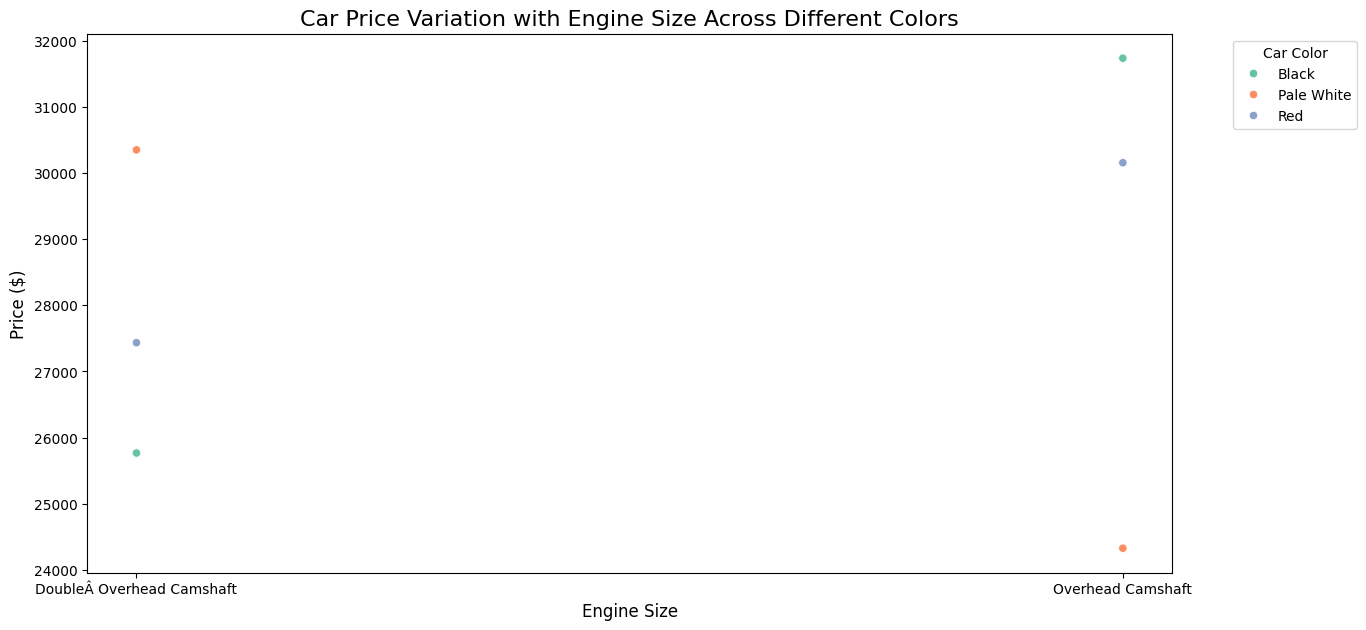

In [ ]:
 # Scatter plot for Engine vs Price by Color
 plt.figure(figsize=(14, 7))
 sns.scatterplot(data=engine_color_price, x='Engine', y='Price ($)', hue='Color', palette='Set2'),
 plt.title("Car Price Variation with Engine Size Across Different Colors", fontsize=16)
 plt.xlabel("Engine Size", fontsize=12)
 plt.ylabel("Price ($)", fontsize=12)
 plt.legend(title="Car Color", bbox_to_anchor=(1.05, 1), loc='upper left')
 plt.show()

In [ ]:
 # Calculate price variation (standard deviation) for each color
 color_price_variation = df.groupby('Color')['Price ($)'].std().reset_index()
 color_price_variation = color_price_variation.rename(columns={'Price ($)': 'Price Variation'})

In [ ]:
 # Sort colors by highest price variation
 color_price_variation = color_price_variation.sort_values(by='Price Variation', ascending=False)
 color_price_variation

,Color,Price Variation
2,Red,15519.360962
0,Black,15286.065976
1,Pale White,14077.346859


<ipython-input-134-0a805314cf15>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=color_price_variation, x='Price Variation', y='Color', palette='viridis')


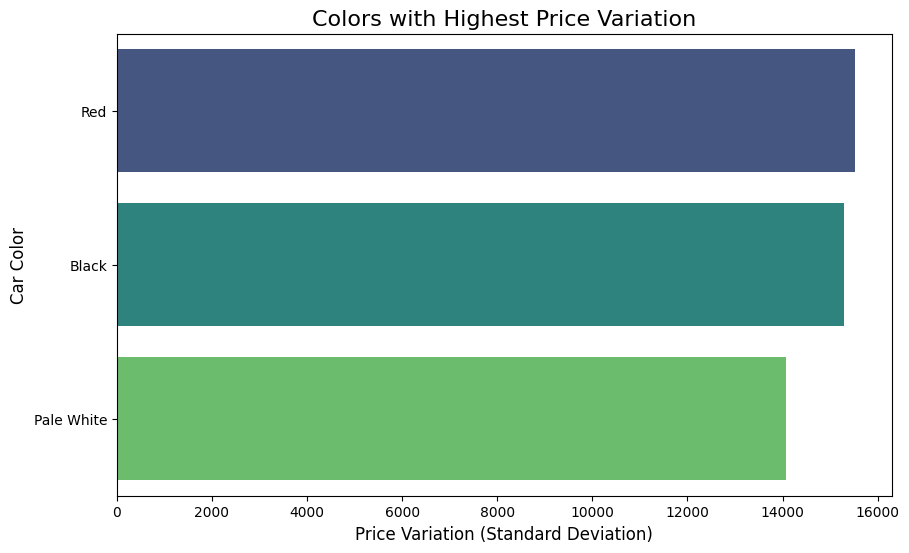

In [ ]:
 # Bar plot for price variation by color
 plt.figure(figsize=(10, 6))
 sns.barplot(data=color_price_variation, x='Price Variation', y='Color', palette='viridis')
 plt.title("Colors with Highest Price Variation", fontsize=16)
 plt.xlabel("Price Variation (Standard Deviation)", fontsize=12)
 plt.ylabel("Car Color", fontsize=12)
 plt.show()

In [ ]:
 # Convert 'Date' to datetime and extract month
 df['Date'] = pd.to_datetime(df['Date'])
 df['Month'] = df['Date'].dt.month

In [ ]:
 # Map months to seasons
 def map_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
 df['Season'] = df['Month'].apply(map_season)

In [ ]:
 # Count sales by month and season
 monthly_sales = df['Month'].value_counts().sort_index()
 seasonal_sales = df['Season'].value_counts()

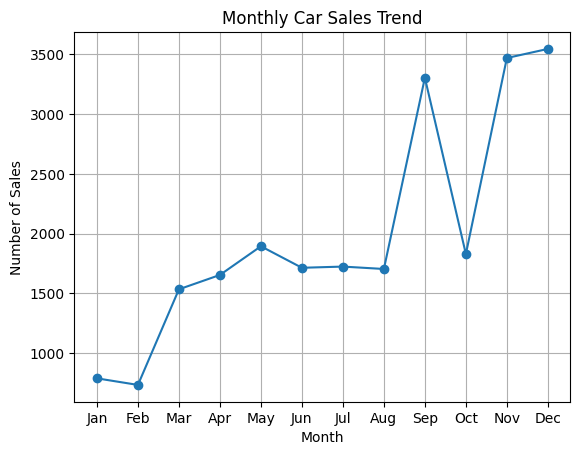

In [ ]:
# Monthly Sales Trend
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title("Monthly Car Sales Trend")
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()

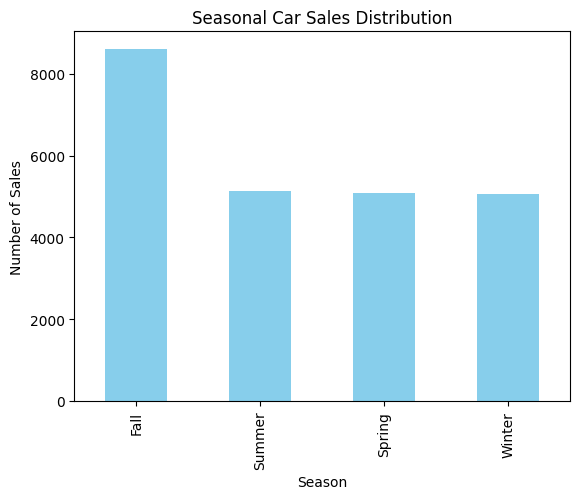

In [ ]:
 # Seasonal Sales Distribution
 seasonal_sales.plot(kind='bar', color='skyblue')
 plt.title("Seasonal Car Sales Distribution")
 plt.xlabel("Season")
 plt.ylabel("Number of Sales")
 plt.show()

In [ ]:
 # Group data by Body Style and Transmission and calculate price statistics
 price_distribution = df.groupby(['Body Style', 'Transmission'])['Price ($)'].describe()
 price_distribution

count          mean           std      min      25%  \
Body Style Transmission                                                         
Hardtop    Auto          1408.0  31520.188210  13687.756740  12000.0  21001.0   
           Manual        1563.0  27016.943698  14072.501848  11000.0  17575.5   
Hatchback  Auto          3458.0  25910.544824  13144.014337   4200.0  18001.0   
           Manual        2670.0  28702.550562  16284.049616   1700.0  17000.0   
Passenger  Auto          2020.0  28915.835149  13946.481932   9000.0  19000.0   
           Manual        1925.0  28969.521039  18523.684163  10000.0  16001.0   
SUV        Auto          3086.0  27501.404407  13299.927913   1200.0  19000.0   
           Manual        3288.0  26079.019161  14621.526541   2200.0  17000.0   
Sedan      Auto          2599.0  29955.294344  14310.910860  12000.0  19000.0   
           Manual        1889.0  29664.271572  15440.056434  11000.0  19001.0   

                             50%      75%      max  
Body Style Transmission                             
Hardtop    Auto          27000.0  43125.0  75501.0  
           Manual        22001.0  29000.0  82500.0  
Hatchback  Auto          21500.0  31000.0  75700.0  
           Manual        23000.0  36001.0  85600.0  
Passenger  Auto          25000.0  38000.0  69801.0  
           Manual        22000.0  37000.0  85800.0  
SUV        Auto          25000.0  33000.0  75501.0  
           Manual        22000.0  28000.0  85500.0  
Sedan      Auto          26000.0  39500.0  69980.0  
           Manual        25000.0  36600.0  69700.0

<Axes: xlabel='Body Style', ylabel='Price ($)'>

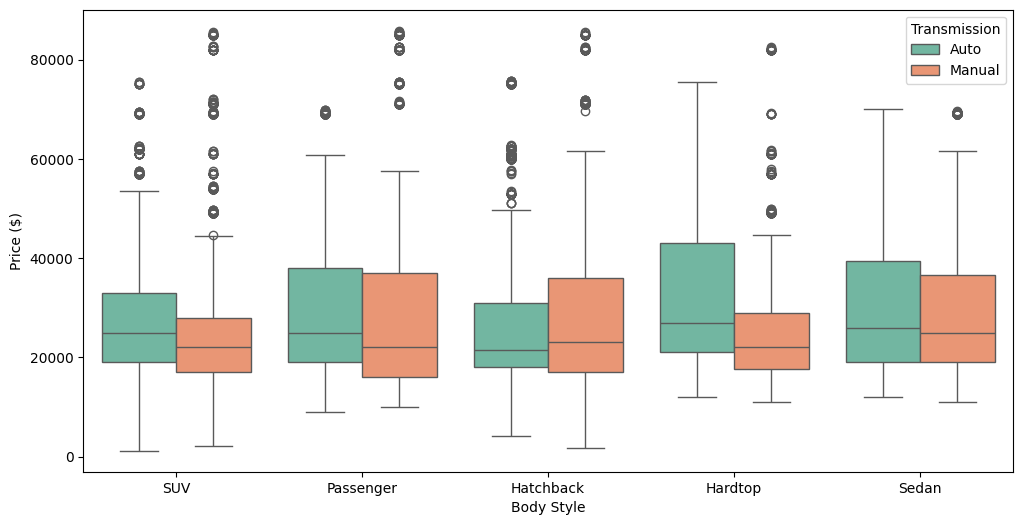

In [ ]:
 # Create a boxplot to visualize price distribution
 plt.figure(figsize=(12, 6))
 sns.boxplot(data=df, x='Body Style', y='Price ($)', hue='Transmission', palette='Set2')

<ipython-input-147-4f7d8c036538>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Transmission')


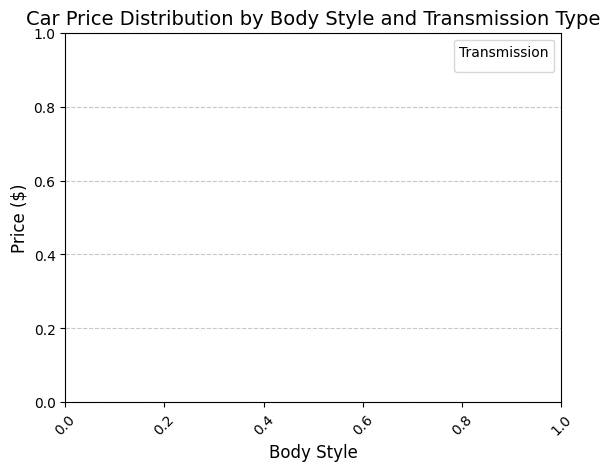

In [ ]:
 # Add labels and title
 plt.title('Car Price Distribution by Body Style and Transmission Type', fontsize=14)
 plt.xlabel('Body Style', fontsize=12)
 plt.ylabel('Price ($)', fontsize=12)
 plt.legend(title='Transmission')
 plt.xticks(rotation=45)
 plt.grid(axis='y', linestyle='--', alpha=0.7)
 plt.show()

In [ ]:
 # Select relevant columns
 correlation_data = df[['Price ($)', 'Engine', 'Annual Income']]
 correlation_data

,Price ($),Engine,Annual Income
0,26000,DoubleÂ Overhead Camshaft,13500
1,19000,DoubleÂ Overhead Camshaft,1480000
2,31500,Overhead Camshaft,1035000
3,14000,Overhead Camshaft,13500
4,24500,DoubleÂ Overhead Camshaft,1465000
...,...,...,...
23901,12000,Overhead Camshaft,13500
23902,16000,DoubleÂ Overhead Camshaft,900000
23903,21000,Overhead Camshaft,705000
23904,31000,DoubleÂ Overhead Camshaft,13500


In [ ]:
 # Ensure numeric columns are properly formatted (if needed)
correlation_data['Engine'] = pd.to_numeric(correlation_data['Engine'], errors='coerce')
correlation_data['Annual Income'] = pd.to_numeric(correlation_data['Annual Income'], errors='coerce')


<ipython-input-152-eb061c27e009>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_data['Engine'] = pd.to_numeric(correlation_data['Engine'], errors='coerce')
<ipython-input-152-eb061c27e009>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_data['Annual Income'] = pd.to_numeric(correlation_data['Annual Income'], errors='coerce')


In [ ]:
 # Drop rows with missing values in the selected columns
 correlation_data = correlation_data.dropna()

In [ ]:
 # Calculate the correlation matrix
 correlation_matrix = correlation_data.corr()
 correlation_matrix

,Price ($),Engine,Annual Income
Price ($),NaN,NaN,NaN
Engine,NaN,NaN,NaN
Annual Income,NaN,NaN,NaN


/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


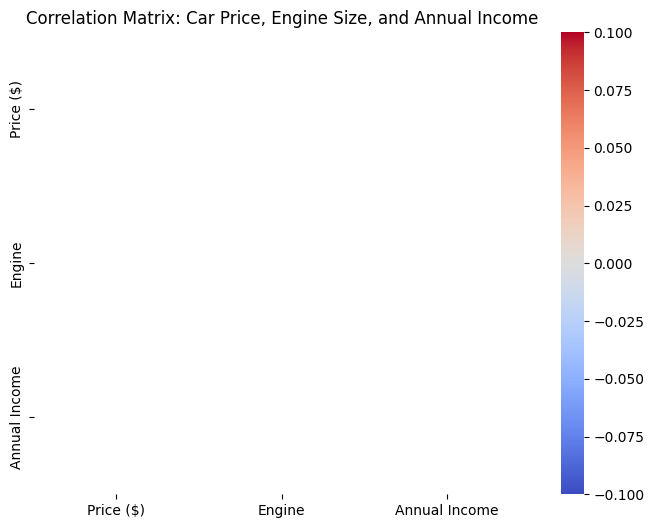

In [ ]:
 # Heatmap of correlation matrix
 plt.figure(figsize=(8, 6))
 sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
 plt.title('Correlation Matrix: Car Price, Engine Size, and Annual Income')
 plt.show()

<ipython-input-156-a1ca03de724d>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter = sns.scatterplot(


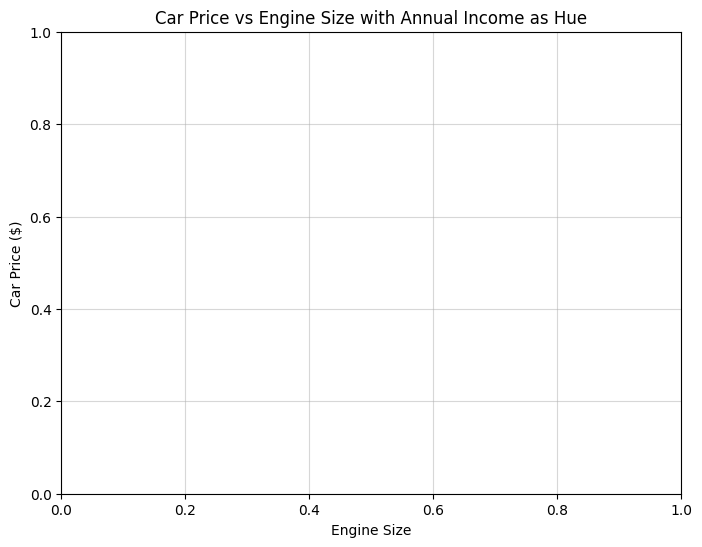

In [ ]:
 plt.figure(figsize=(8, 6))
 scatter = sns.scatterplot(
 data=correlation_data,
 x='Engine',
 y='Price ($)',
 hue='Annual Income',
 palette='viridis'
 )
 plt.title('Car Price vs Engine Size with Annual Income as Hue')
 plt.xlabel('Engine Size')
 plt.ylabel('Car Price ($)')
 plt.grid(alpha=0.5)

<ipython-input-158-517f804bfcc6>:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Annual Income', bbox_to_anchor=(1.05, 1), loc='upper left')


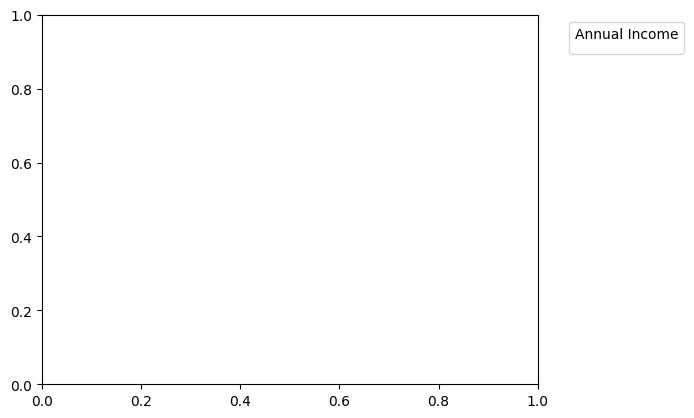

In [ ]:
 # Add legend instead of colorbar for the hue
 plt.legend(title='Annual Income', bbox_to_anchor=(1.05, 1), loc='upper left')

 **EDA Amazon Sales Data**

In [ ]:
 # Basic Libraries
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 import plotly.express as px

In [ ]:
# Load dataset
df = pd.read_csv('/content/amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
 #Shape of Data
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [ ]:
 df.shape

(1465, 16)

In [ ]:
 # Check for Null Values
df.isnull().sum()


,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


In [ ]:
 #Data Types
 df.dtypes

,0
product_id,object
product_name,object
category,object
discounted_price,object
actual_price,object
discount_percentage,object
rating,object
rating_count,object
about_product,object
user_id,object


In [ ]:
 # Convert the 'rating' column to numeric, forcing invalid values to NaN
 df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

In [ ]:
 # Group by 'category' and calculate the average rating
 average_rating_per_category = df.groupby('category')['rating'].mean()
 average_rating_per_category

,rating
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,4.050000
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",4.250000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",4.150000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",4.300000


In [ ]:
 # Sort the DataFrame by 'category' and 'rating_count' in descending order
top_rating_count_by_category = df.sort_values(by=['category', 'rating_count'], ascending=[True, False])

In [ ]:
 # Get the top product in each category
 top_products = top_rating_count_by_category.groupby('category').head(1)
 top_products

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1157,B0912WJ87V,Reffair AX30 [MAX] Portable Air Purifier for C...,Car&Motorbike|CarAccessories|InteriorAccessori...,"₹2,339","₹4,000",42%,3.8,"1,118",[NEW LAUNCH - INNOVATIVE DESIGN] EFFICIENT PUR...,"AG6W5HESRSDLBX3NCYOOUGFOWERA,AED4U5CF37HVSYPMD...","Arivazhagan,Ajit,swanand pandit,Venkatesh S.,S...","R3TOOFPX256D59,R1PR50BDQOEIIO,R392FI4QWXWOX5,R...","Liked it,User friendly and effective,Not as pe...","As of now its working fine, but don't expect m...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Reffair-AX30-MAX-Interna...
695,B097C564GC,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...",Computers&Accessories|Accessories&Peripherals|...,₹294,"₹4,999",94%,4.3,"4,426",【WIDER COMPATIBILITY】This USB C Female to USB ...,"AGO5SRT3ESLNL5WTRQFD5BSIYPQA,AGGNODUMRADB3PQQT...","Naga Sai Gadagottu,Neha Sharma,Amazon Customer...","R3CUNCZTU43JPP,RSO46BN8S4OSU,R2UD5D7T4DZRE5,R2...","Tiny helping hand,Good product,As a whole good...",This eliminates the need to buy chargers for t...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/rts-Adapter-Charging-Con...
906,B009LJ2BXA,Hp Wired On Ear Headphones With Mic With 3.5 M...,Computers&Accessories|Accessories&Peripherals|...,₹649,₹999,35%,3.5,"7,222",Powerful bass and clear treble sounds|Wired co...,"AFIZUD4UBB67LGWY6CVLRHKA75IA,AG2TD3527KNZZNE46...","Deepthi,Nitin Mishra,Raju Chacko,A.VISWANATHAR...","R392ZYXC6D3GY0,R1MJHZXZ09ETAE,R20PJKJTCF9RXN,R...","Headset,Overall a good product. Sound quality ...","Not a perfect fit for long usage,One problem y...",https://m.media-amazon.com/images/I/31eE6slx4E...,https://www.amazon.in/HP-B4B09PA-Headphones-wi...
772,B08HD7JQHX,HUMBLE Dynamic Lapel Collar Mic Voice Recordin...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹499,60%,3.3,"2,804",SOUND RECORDING: With the Miracle Sound Microp...,"AFILRU3X2FCDPDW5UKLT6C7OPJSA,AFWTGD4FCS2E2U2TD...","Afrina Hasnat,BKBasu,Ayush Raghuvanshi,Wilfrie...","REQ74ZVYY2I01,R15RS7QIKMBY5Z,RCYHKHTW0MAL8,R1A...","No TRRS to TRS converter in the box,Not suitab...",This mic's sound quality is very good but if y...,https://m.media-amazon.com/images/I/41T3Z43M4y...,https://www.amazon.in/HUMBLE-Dynamic-Recording...
844,B08K9PX15C,Zebronics Zeb Wonderbar 10 USB Powered 2.0 Com...,Computers&Accessories|Accessories&Peripherals|...,₹849,"₹1,499",43%,4.0,"7,352",The 2.0 speaker has a versatile design that ca...,"AFC7Q5Q64XM2Y64FT7Y3L2YVALRA,AG7C5TFPIBMWQQC2S...","Balamurugan Trivandrum,prathmesh sawant,Pravee...","R2USVKN5VQX7ZL,R36O11JTBG8NKH,R1OC5OKQ1ZHRT4,R...",Nice product from Zebronics... Using for lapto...,Zebronics Product is always good. I bought thi...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Zebronics-Wonderbar-Powe...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,B07KCMR8D6,Classmate Octane Neon- Blue Gel Pens(Pack of 5...,OfficeProducts|OfficePaperProducts|Paper|Stati...,₹50,₹50,0%,4.3,"5,792",5 vibrant Neon body color|Smooth and fast writ...,"AEVPRYZLGHNMEZA5BYGIX36LYZXA,AEZPOZQEEBFFXZ2EQ...","Gatij saini,Biswajit Kundu,Altaf Khan,Agam Sar...","RZAAQFY7BDSWC,R3604ZO2AA4PK5,R3C8K6Z6W9MDTQ,R3...","Nice ball pen,Good product,Average,Nice Pen,It...","Very nice ball pen,Thank you Amazon,Easy to ho...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Classmate-Octane-Neon-Pa...
993,B00S2SEV7K,"Pilot Frixion Clicker Roller Pen (Blue), (9000...",OfficeProducts|OfficePaperProducts|Paper|Stati...,₹90,₹100,10%,4.1,"6,199",Unique patented thermo-sensitive Frixion Ink|A...,"AFSJUWV2I4CD53EPCRMOQJ3CWR3Q,AGLYAYWTFPPMLELDG...","Abhay Gupta,vimal rastogi,Sughnesha,Prityush,A...","R1QL22IXTM3HYM,R2BCCQQCMW4X56,R8MW9P91PIMJ3,R1...","Good... 😊,Nice pen but it has some problems.,A...",Bahut aacha hai ye pen

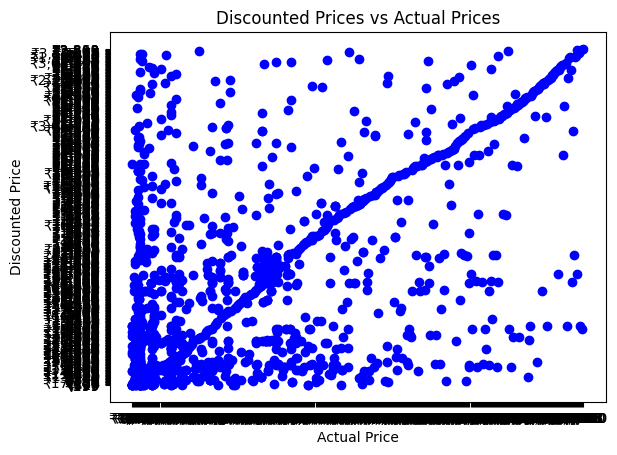

In [ ]:
 # Scatter plot for discounted vs actual prices
 plt.scatter(df['actual_price'], df['discounted_price'], color='blue')
 plt.xlabel("Actual Price")
 plt.ylabel("Discounted Price")
 plt.title("Discounted Prices vs Actual Prices")
 plt.show()

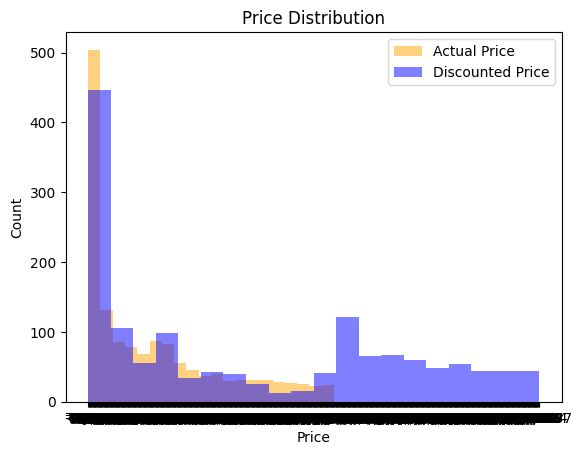

In [ ]:
 # Histogram for discounted and actual prices
 plt.hist(df['actual_price'], bins=20, alpha=0.5, label='Actual Price', color='orange')
 plt.hist(df['discounted_price'], bins=20, alpha=0.5, label='Discounted Price', color='blue')
 plt.xlabel("Price")
 plt.ylabel("Count")
 plt.title("Price Distribution")
 plt.legend()
 plt.show()

In [ ]:
# Convert 'discount_percentage' to numeric, force errors to NaN
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')

In [ ]:
 # Group by 'category' and calculate the average discount percentage
 average_discount_per_category = df.groupby('category')['discount_percentage'].mean()
 average_discount_per_category

,discount_percentage
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,NaN
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,NaN
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",NaN
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",NaN
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",NaN


In [ ]:
 from collections import Counter
 # Choose the column for reviews (e.g., 'review_content')
 text_column = df['review_content']

In [ ]:
 # Combine all reviews into one string and split into words
 words = " ".join(text_column.dropna()).split()
 words

['Looks',
 'durable',
 'Charging',
 'is',
 'fine',
 'tooNo',
 'complains,Charging',
 'is',
 'really',
 'fast,',
 'good',
 'product.,Till',
 'now',
 'satisfied',
 'with',
 'the',
 'quality.,This',
 'is',
 'a',
 'good',
 'product',
 '.',
 'The',
 'charging',
 'speed',
 'is',
 'slower',
 'than',
 'the',
 'original',
 'iPhone',
 'cable,Good',
 'quality,',
 'would',
 'recommend,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/81---F1ZgHL._SY88.jpg,Product',
 'had',
 'worked',
 'well',
 'till',
 'date',
 'and',
 'was',
 'having',
 'no',
 'issue.Cable',
 'is',
 'also',
 'sturdy',
 'enough...Have',
 'asked',
 'for',
 'replacement',
 'and',
 'company',
 'is',
 'doing',
 'the',
 'same...,Value',
 'for',
 'money',
 'I',
 'ordered',
 'this',
 'cable',
 'to',
 'connect',
 'my',
 'phone',
 'to',
 'Android',
 'Auto',
 'of',
 'car.',
 'The',
 'cable',
 'is',
 'really',
 'strong',
 'and',
 'the',
 'connection',
 'ports',
 'are',
 'really',
 'well',
 'made.',
 'I',
 'already',
 'has',
 'a',
 

In [ ]:
# Remove non-numeric characters (like ₹, commas) and convert to float
df['discounted_price'] = df['discounted_price'].replace({'₹': '', ',': ''}, regex=True).astype(float)

In [ ]:
# Convert the column to numeric, forcing errors to NaN (which can be handled)
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')

In [ ]:
# Now calculate the correlation
correlation = df[['discounted_price', 'rating']].corr()
correlation

,discounted_price,rating
discounted_price,1.000000,0.120337
rating,0.120337,1.000000


**EDA - 4**

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/spotify.csv')

In [ ]:
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [ ]:
#Displays information about the dataset, including the number of rows, column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [ ]:
df.describe()

,Popularity,Duration (ms)
count,440.000000,440.000000
mean,75.736364,206810.040909
std,9.886534,53576.930289
min,29.000000,81666.000000
25%,70.000000,172778.500000
50%,77.000000,201866.000000
75%,83.000000,235119.750000
max,97.000000,501648.000000


In [ ]:
df.isnull().sum()

,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


In [ ]:
# Check for duplicate rows
df.duplicated().sum()

27

In [ ]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
# Display the cleaned data
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


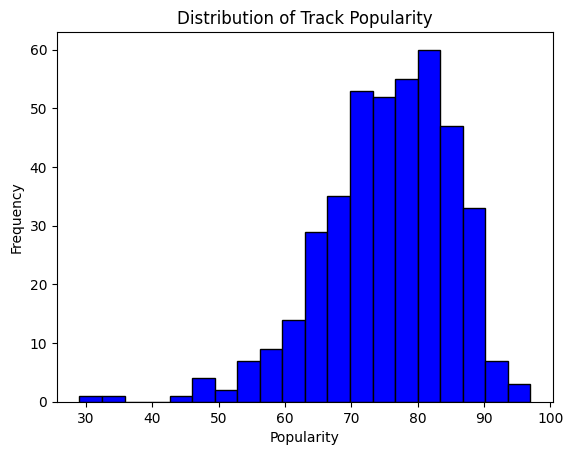

In [ ]:
# Plot the histogram of Popularity
plt.hist(df['Popularity'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

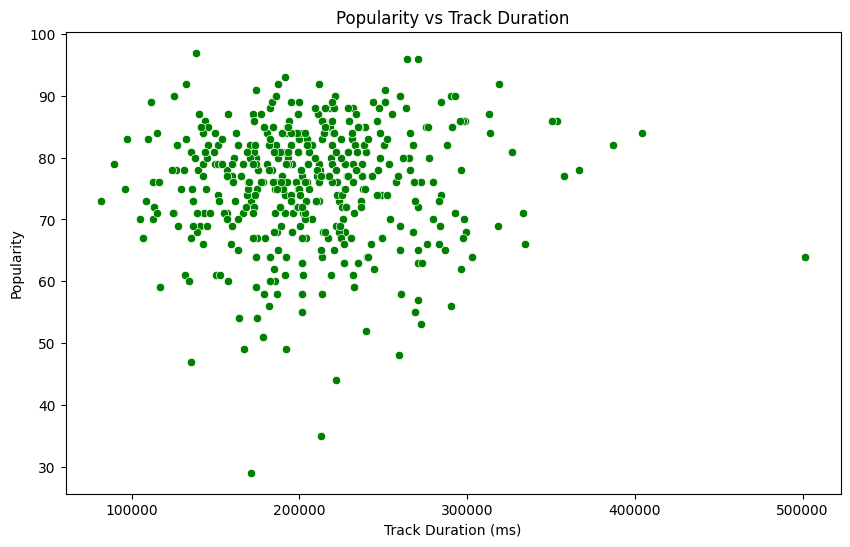

In [ ]:
# Plot the scatter plot between Popularity and Duration
plt.figure(figsize=(10,6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df, color='green')
plt.title('Popularity vs Track Duration')
plt.xlabel('Track Duration (ms)')
plt.ylabel('Popularity')
plt.show()

<ipython-input-202-93e3abba27e3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Artist', data=df, order=df['Artist'].value_counts().index, palette='viridis')


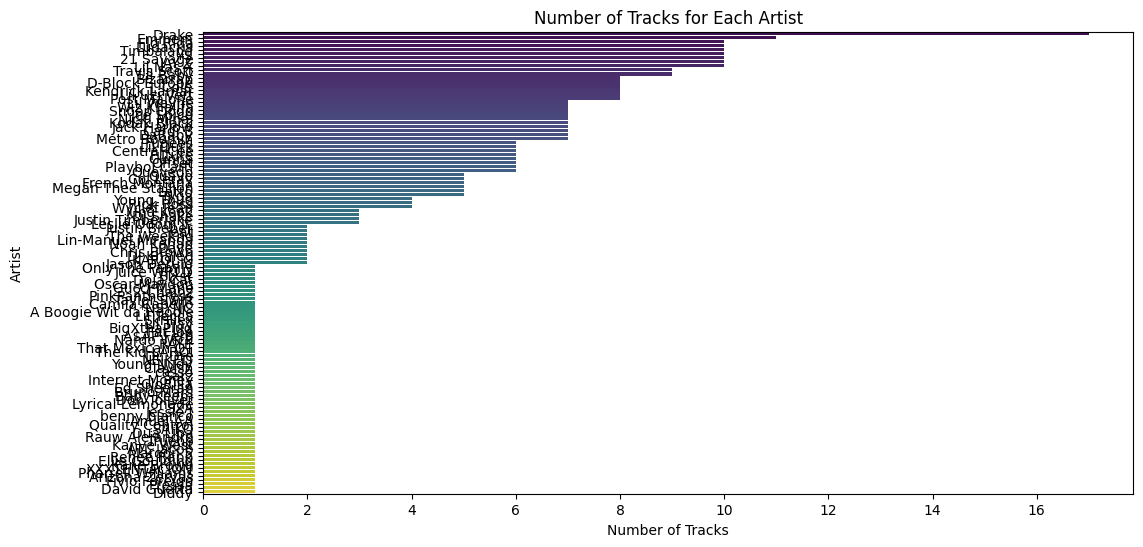

In [ ]:
# Plot the count of tracks for each artist
plt.figure(figsize=(12,6))
sns.countplot(y='Artist', data=df, order=df['Artist'].value_counts().index, palette='viridis')
plt.title('Number of Tracks for Each Artist')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()

In [ ]:
# Sort the dataset by Popularity in ascending order to get the least popular tracks
least_popular_tracks = df.sort_values(by='Popularity').head(5)
least_popular_tracks

,Artist,Track Name,Popularity,Duration (ms),Track ID
207,Pressa,Attachments (feat. Coi Leray),29,171000,6EfJ8Ct3GHbBz2YlyPnMYb
231,Justin Bieber,Intentions,35,212853,7jAVt70Xdg8EwOtsFB1ZqK
413,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
225,Lil Baby,On Me - Remix,47,135444,2uUFVnVFERNxUdcmvEs7LB
407,Wyclef Jean,911 (feat. Mary J. Blige),48,259333,28hgx2bWXcaBJeC9zVwrBq


In [ ]:
# Calculate the average popularity for each artist
avg_popularity = df.groupby('Artist')['Popularity'].mean()
avg_popularity

,Popularity
Artist,
*NSYNC,67.00
2 Chainz,72.00
21 Savage,83.80
A Boogie Wit da Hoodie,80.00
A$AP Ferg,69.00
...,...
Young Nudy,67.00
Young Thug,73.75
benny blanco,72.00


In [ ]:
# Get the top 5 most popular artists by average popularity
top_5_artists = avg_popularity.sort_values(ascending=False).head(5)
top_5_artists

,Popularity
Artist,
cassö,92.000000
Trueno,89.000000
David Guetta,87.000000
Travis Scott,86.555556
¥$,85.100000


In [ ]:
# Get the top 5 artists by average popularity
top_5_artists = df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head(5)
top_5_artists

,Popularity
Artist,
cassö,92.000000
Trueno,89.000000
David Guetta,87.000000
Travis Scott,86.555556
¥$,85.100000


In [ ]:
# For each artist, find their most popular track
for artist in top_5_artists.index:
    most_popular_track = df[df['Artist'] == artist].sort_values(by='Popularity', ascending=False).iloc[0]
    print(f"{artist}: {most_popular_track['Track Name']}")

cassö: Prada
Trueno: Mamichula - con Nicki Nicole
David Guetta: Baby Don't Hurt Me
Travis Scott: FE!N (feat. Playboi Carti)
¥$: CARNIVAL


In [ ]:
# Select the numerical columns you want to include in the pair plot
numerical_columns = ['Popularity', 'Duration (ms)']
numerical_columns

['Popularity', 'Duration (ms)']

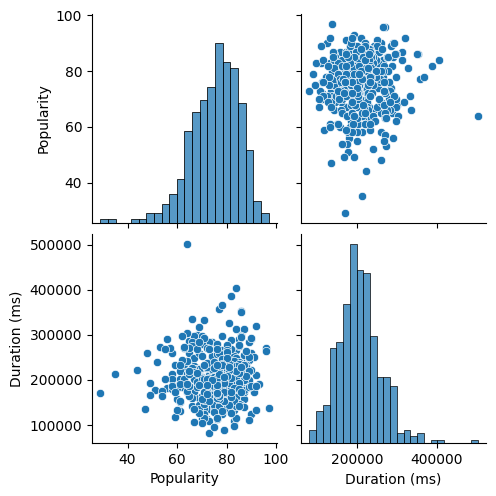

In [ ]:
# Create the pair plot
sns.pairplot(df[numerical_columns])
plt.show()

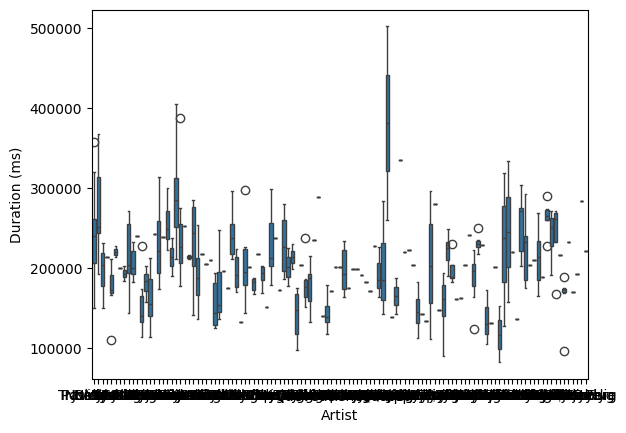

In [ ]:
# Create a box plot
sns.boxplot(x='Artist', y='Duration (ms)', data=df)
plt.show()

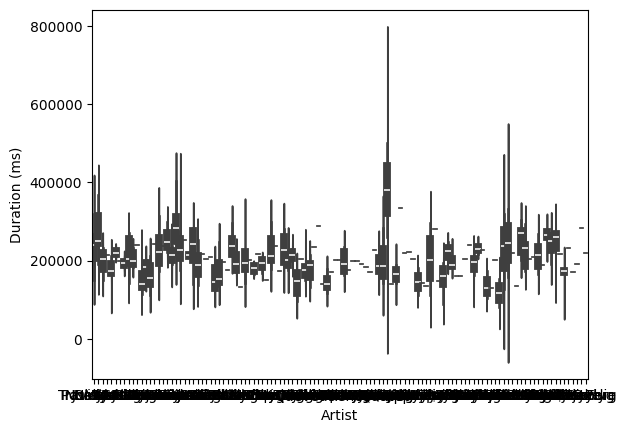

In [ ]:
# Create a violin plot
sns.violinplot(x='Artist', y='Duration (ms)', data=df)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 52.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 62.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 30.0% of the points cannot be plac

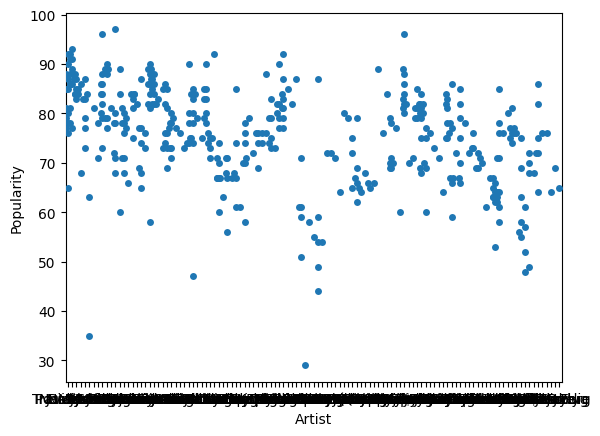

In [ ]:
# Create a swarm plot
sns.swarmplot(x='Artist', y='Popularity', data=df)
plt.show()

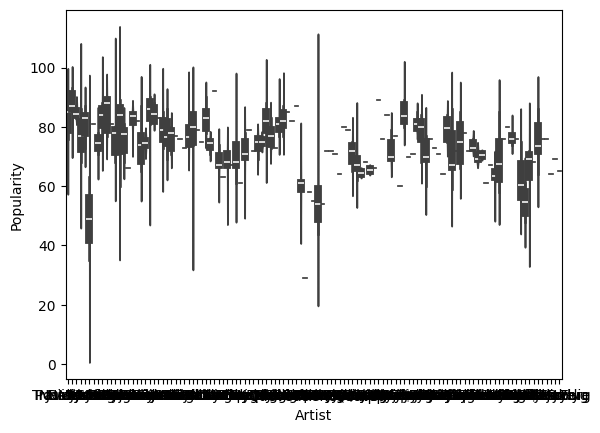

In [ ]:
# Create a violin plot
sns.violinplot(x='Artist', y='Popularity', data=df)
plt.show()